In [1]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
import pandas as pd
import numpy as np
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from fractions import Fraction
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from sympy import Rational as R
from sympy import Matrix as M
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML
import statsmodels.stats.power as smp
import statsmodels.api as sm

In [2]:
# Let us create a UDF which will enable us to shade areas under the curve for standardnormal distribution

def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(z, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [3]:
# Let us create a UDF which will enable us to shade areas under the curve for t-distribution

def draw_t_score(x, df, cond, mu, sigma, title):
    y = t.pdf(x, df, mu, sigma)
    t = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(t, t.pdf(t, df, mu, sigma))
    plt.title(title)
    plt.show()

## Exercise 1 </br>


In [149]:
display(Image(url='../images/Screenshot 2023-06-05 at 19.37.38.png', width=1200, height=400,unconfined=True))

display(Image(url='../images/Screenshot 2023-06-06 at 17.37.34.png', width=1200, height=400,unconfined=True))

In [168]:
## a
x,y,c = sp.symbols('x,y,c')

f_x_y = c

s_1 = sp.integrate( sp.integrate(f_x_y, (y,x-1,x+1)), (x,1,4))
s_2 = sp.integrate( sp.integrate(f_x_y, (y,0,x+1)), (x,0,1))

## sum all the surfaces and solve the ecuation

display(sp.solve(s_1 + s_2 - 1,c))

## b 
## it is joing prob so do the 2 integral 
f_x_y = R(2,15)
result = sp.integrate(f_x_y, (y,0,0.5),(x,0,0.6))
display(result)

## ask teacher maybe
## not sure about this
## c
f_x_y = R(2,15)
result = sp.integrate(f_x_y, (y, 0, x+1),(x ,0, 1))
display(result) 

## d
f_x_y = R(2,15)
ex = x * f_x_y
p1  = sp.integrate(ex, (y, 0, x+1), (x,0,1))
p2  = sp.integrate(ex, (y,x-1,x+1),(x,1,4))
result = p1 + p2
display(round(result,4))


## e
f_x_y = R(2,15)
result = sp.integrate(f_x_y, (y,x-1,x+1))

display(result)

## Exercise 2

In [26]:
display(Image(url='../images/Screenshot 2023-06-05 at 21.29.18.png', width=1200, height=200,unconfined=True))

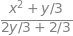

In [39]:
## a
f_x_y = x**2 + R(1,3)*y
f_x_given_y = f_x_y / sp.integrate(f_x_y,(x,-1,1))

display(f_x_given_y)


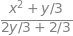

<IPython.core.display.Math object>

In [41]:
## b
f_x_y = x**2 + R(1,3)*y
f_x_given_y = f_x_y / sp.integrate(f_x_y,(x,-1,1))

display(f_x_given_y)

result = sp.integrate(f_x_y,(x,0,1),(y,0,1))

display(Math("P(X>0 | Y=y) = " + repr(result)))

## Exercise 3 </br>

Suppose that the random variable X has the discrete uniform distribution: </br>
$f(x)=\begin{bmatrix}1/4,x=3,4,5,6 \cr 0, otherwise\end{bmatrix}$ </br>
A random sample of n=20 is selected from this distribution. Find the probability that the sample mean is greater than 4.8 .


## Exercise 4 </br>

A normal population has the mean of 20 and the variance of 100. A random sample of size n = 69 is selected. How large must the sample be if you want to halve the standard deviation of the sample mean? State your answer as an integer between 0 and 999.


In [46]:
sample_size_old = 69
variance = 100
standard_deviation_old = np.sqrt(variance)
standard_deviation_new = standard_deviation_old/2

n_new = (sample_size_old) * (standard_deviation_old / standard_deviation_new)**2

print(n_new)

276.0


## Exercise 5 </br>

In [50]:
display(Image(url='../images/Screenshot 2023-06-06 at 12.11.29.png', width=1200, height=200,unconfined=True))

display(Image(url='../images/Screenshot 2023-06-06 at 14.19.51.png', width=1200, height=400,unconfined=True))

In [67]:
## Z = X_a - X_b = 90 since cdf

mean_a = 2000
mean_b = 2100

sample_size = 100
sample_size_prob = 90

variance = 3500

## accroding to the formula
result = (sample_size_prob - (mean_b - mean_a))/np.sqrt(variance/sample_size+variance/sample_size)
probability= stats.norm.cdf(result)

display(Math("P(X_B - X_A < 90) = " + repr(round(probability,4))))

<IPython.core.display.Math object>

## Exercise 6 </br>
Correlation coefficient: notation Rho = $\rho$ </br>
The correlation coefficient $\rho_{XY}$ or  $\rho(X,Y)$ is obtained by normalizing the covarriance. More specifically we use the standardized version of X and Y. </br>
u = $\frac{X-EX}{\sigma_X}$ , v = $\frac{Y-EY}{\sigma_Y}$  </br>
$\rho$ = Cov(U,V)= Cov($\frac{X-EX}{\sigma_X}$,$\frac{Y-EY}{\sigma_Y}$)  </br>
= Cov($\frac{X}{\sigma_X}$,$\frac{Y}{\sigma_Y}$) (property 4) </br>
= $\frac{Cov(X,Y) }{\sigma_X*\sigma_Y}$ (property 5) </br>

In [71]:
Index = [10,11,12]
Columns = {4:[1/14,1/14,1/14],5:[2/14,2/14,2/14],6:[1/14,1/14,1/14]}

df = pd.DataFrame(data=Columns, index = Index)

## find the marginal PDF
fx = df.sum(1)
fy = df.sum(0)

## Calculate the Expected value for y and x
EX = np.array(df.index).dot(fx)
EY = np.array(df.columns).dot(fy)

## Calculate the square E[X**2] of for x and y, used to calculate the variance
EX2 = (np.array(df.index)**2).dot(fx)
EY2 = (np.array(df.columns)**2).dot(fy)

## calculate the variance for x and y
VX = EX2 - EX**2
VY = EY2 - EY**2

## calculate the expected value of product XY
EXY = np.array(df.index).dot(np.array(df)).dot(np.array(df.columns))

## calculate covariance 
Cov = EXY -(EX*EY)

## calculate correlation coefficient
corr = Cov/np.sqrt(VX*VY)

display(Math("\\rho(X,Y) = " + repr(round(corr,4))))


<IPython.core.display.Math object>

## Exercise 7

In [73]:
display(Image(url='../images/Screenshot 2023-06-06 at 15.24.37.png', width=1200, height=500,unconfined=True))

In [78]:
## a
f_x_y = R(1,4)*x**2 + R(1,6)*y

marginal_pdf_x = sp.integrate(f_x_y, (y, 0, 2))
marginal_pdf_y = sp.integrate(f_x_y, (x, -1, 1))

display(marginal_pdf_x)
display(marginal_pdf_y)


In [79]:
## b
f_x_y = R(1,4)*x**2 + R(1,6)*y

probability = sp.integrate(f_x_y, (y, 0, 1),(x, 0, 1))

display(probability)

In [81]:
## c
## or: PX - PY - PX_AND_PY
f_x_y = R(1,4)*x**2 + R(1,6)*y

px = sp.integrate(f_x_y, (y, 0, 2),(x, 0, 1))
py = sp.integrate(f_x_y, (y, 0, 1),(x, -1, 1))

px_and_py = sp.integrate(f_x_y, (y, 0, 1),(x, 0, 1))

result = px + py - px_and_py
display(result)

In [82]:
## d
## given: PX_AND_PY/ PY 
f_x_y = R(1,4)*x**2 + R(1,6)*y


py = sp.integrate(f_x_y, (y, 0, 1),(x, -1, 1))

px_and_py = sp.integrate(f_x_y, (y, 0, 1),(x, 0, 1))

result = px_and_py/py
display(result)

In [83]:
## 3
## given: X+Y >0
f_x_y = R(1,4)*x**2 + R(1,6)*y


p1 = sp.integrate(f_x_y, (y, 0, 2),(x, 0, 1))

p2 = sp.integrate(f_x_y, (y, -x, 2),(x, -1, 0))

result = p1+p2
display(result)

## Exercise 9

In [84]:
display(Image(url='../images/Screenshot 2023-06-06 at 15.42.23.png', width=1200, height=500,unconfined=True))

In [107]:
## a
f_x_y = sp.E **(-y)

f_y_given_x = f_x_y /  sp.integrate(f_x_y, (y, x, sp.oo))

display(f_y_given_x)

## expected value
x=1
e_y_given_x = y * f_y_given_x
result = sp.integrate(e_y_given_x,( y, x, sp.oo))
display(result)


In [133]:
## b
x,y = sp.symbols('x, y ')
f_x_y = sp.E **(-y)

## calc the func first then the other stuff then the expected value
f_y_given_x = f_x_y / sp.integrate(f_x_y, (y, x, sp.oo))

display(f_y_given_x)

res = sp.integrate(f_y_given_x.subs(x,1),(y,1,2))
display(res)
display(round(res,2))


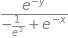

In [129]:
## c
x,y = sp.symbols('x, y ')

f_x_y = sp.E **(-y)

## calc the func first then the other stuff then the expected value
f_x_given_y = f_x_y / sp.integrate(f_x_y, (x, 0, y))

display(f_y_given_x)
res = sp.integrate(f_x_given_y.subs(y,4), (x , 1, 2))
display(res)

## Exercise 10 </br>

Consider the one-sided confidence interval expressions for a mean of normal population with known variance. State your answer as an integer between 0 and 99 such that the confidence level is stated as a two decimal percentage.


In [95]:
# Set the z-critical value
z_critical = 1.93

# Calculate the area under the standard normal distribution curve up to the z-critical value
confidence_level = norm.cdf(z_critical)


print(round(confidence_level,5))

# Set the z-critical value
z_critical = 1.18

# Calculate the area under the standard normal distribution curve up to the z-critical value
confidence_level = norm.cdf(z_critical)


print(round(confidence_level,5))

# Set the z-critical value
z_critical = 1.45

# Calculate the area under the standard normal distribution curve up to the z-critical value
confidence_level = norm.cdf(z_critical)

print(round(confidence_level,4))

0.9732
0.881
0.9265


## Exercise 11 </br>

Consider results of 20 randomly chosen people who have run a marathon. Their times, in minutes, are as follows: 137, 146, 150, 163, 166, 179, 186, 193, 196, 213, 218, 225, 236, 239, 254, 269, 271, 279, 282, 295. </br>
Calculate a 90% upper confidence bound on the mean time of the race. Assume distribution to be normal. Use the ceiling function such that your answer is an integer between 0 and 999. </br>


In [104]:
x = symbols('x')

sample = [137, 146, 150, 163, 166, 179, 186, 193, 196, 213, 218, 225, 236, 239, 254, 269, 271, 279, 282, 295]

## Please notice THIS / since we taking in consideration just one side we have to take the full alpha(error) which is 10 % => aplha = 20%
level_of_confidence = 0.80
n = len(sample) ## sample size
SE = stats.sem(sample) ## standard error
sample_mean = np.mean(sample)

CI = stats.t.interval(level_of_confidence, n-1, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100+5) + ' % upper confidence interval for the sample mean is  \u03bc <'+ repr(round(CI[1],0)))


A 85.0 % upper confidence interval for the sample mean is  μ <230.0


## Exercise 12 </br>

Assume a random sample has been taken from a normal distribution. You are told that the standard error was 1.55, the standard deviation was 6.02, and the sum of all observations was 797.90. Based on this information find the values below. </br>


Sample size: 15
Sample mean: 53
A 95.0 % confidence interval for the sample mean is [50 ; 56]


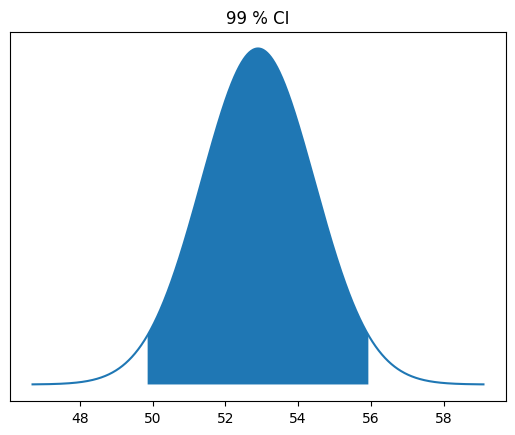

In [125]:
SE = 1.55
standard_deviation= 6.02
observation_sum = 797.90

n = standard_deviation**2/SE**2
print("Sample size: "+ repr(floor(n)))

sample_mean = observation_sum/n
print("Sample mean: "+ repr(round(sample_mean)))

level_of_confidence = 0.95

CI = norm.interval(level_of_confidence, loc=sample_mean, scale=SE)

## for some reason for the upper interval I got 56 instead of 57
print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0])) + ' ; '
      + repr(round(CI[1])) + ']')



## Exercise 13 </br>

To estimate the portion of voters who plan to vote for Candidate A in an election, a random sample of size n from the voters is chosen. The sampling is done with replacement. Let θ be the portion of voters who plan to vote for Candidate A among all voters. How large does n need to be so that we can obtain a 90% confidence interval with 3 % margin of error? State your answer as an integer between 0 and 99. </br>


In [147]:

display(Image(url='../images/Screenshot 2023-06-06 at 17.25.02.png', width=1200, height=200,unconfined=True))


display(Image(url='../images/Screenshot 2023-06-06 at 17.34.43.png', width=1200, height=200,unconfined=True))

In [146]:
margin_error = 3/100
alpha = 0.1
z_crit = stats.norm.ppf(1-alpha/2)
display(Math('z_{0.1/2}='+latex(round(z_crit,3))))

## estimate the p/ this part is super weird  
n = ((z_crit/margin_error)**2)*0.25
print(round(n))

<IPython.core.display.Math object>

752


## Exercise 14 </br>

A manufacturer is interested in the output voltage of a power supply used in a PC. Output voltage is assumed to be normally distributed with known standard deviation of 0.3 volt, and the manufacturer wishes to test H0:μ0=5, using n = 10 units. The acceptance region for this test is 4.85≤μ≤5.15. Find the value of α. State your answer as an integer between 10 and 99 such that you supply two decimal precision, correctly rounded off </br>


In [191]:
lower_acceptance_value = 4.85 
upper_acceptance_value = 5.15

sample_size = 10
hypothesis_rate = 5

standard_deviation = 0.3

true_mean = (5.15-4.85)


test_statistic_hypothesis = (true_mean-hypothesis_rate)/(standard_deviation / np.sqrt(sample_size))
display(Math( 'z_{0}='+ latex(round(test_statistic_hypothesis,8))))

## notice we are using sf function, alternative use 1-cdf
## to test both sides multiply by 2
p_value = 2*norm.sf(np.abs(test_statistic_hypothesis))
display(Math( 'P-value='+ latex(round(p_value,6))))

0.3000000000000007


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Exercise 15 </br>

A manufacturer is interested in the output voltage of a power supply used in a PC. Output voltage is assumed to be normally distributed with known standard deviation of 0.3 volt, and the manufacturer wishes to test H0:μ0=5, using n = 10 units. The acceptance region for this test is 4.85≤μ≤5.15. Find the value of α. State your answer as an integer between 10 and 99 such that you supply two decimal precision, correctly rounded off </br>


In [169]:

alpha = 0.05
sample_size = 100
sample_mean = 260.3
sample_standard_deviation = 13.41## small s
hypothesis_mean = 280 ## null hypothesiss

## carefully this is a right sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
ddof = sample_size-1
t_crit_ddof = stats.t.ppf(1-alpha,ddof)
display(Math('t_{\\frac{0.01}{2},19}='+latex(round(t_crit_ddof,3))))

test_statistic_hypothesis = (sample_mean-hypothesis_mean)/( sample_standard_deviation/np.sqrt(sample_size))
display(Math( 't_{0}='+ latex(round(test_statistic_hypothesis,2))))

## notice we are using sf function, alternative use 1-cdf
p_value = 2*t.sf(np.abs(test_statistic_hypothesis), sample_size-1)
display(Math('P-value='+ latex(round(p_value,5))))

if p_value > alpha:
    print("Reject since " + repr(p_value) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(p_value) + ' > ' + repr(alpha))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fail to reject since 1.2986436221214688e-26 > 0.05


## Exercise 16 </br>

A recent study among 254 computer science graduates from Aarhus University was made in order to determine how successful the former students were in their current employment. 98 of these students had taken a course in linear algebra and of these 92 were classified as “successful” in their current employment. 136 of the students who had not taken a course in linear algebra were classified as “successful” in their current employment.

Is there evidence to support the claim that computer science graduates who had taken a linear algebra course were more successful in their current employment than those who had not taken such a course with a significance of 0.05? Let pA
denote the proportion of succesful students who had taken linear algebra and let pAc

denote the proportion successful students who had not taken the linear algebra course. First identify the correct hypotheses by dragging the correct hypothesis to the appropriate placeholder. Then state the test statistic, the critical value, and the p-value.
</br>

**Approximate Tests on the Difference of Two Population Proportions**
**1.Parameter of interest:The parameters of interest are $P_1$ and $P_2$ , the proportion of computer science graduates who had taken a linear algebra course were more successful in their current employment than those who had not taken such a course**</br >
**2.Null Hypothesis: $H_0: p_1 =p_2$** </br>
**3.Alternative Hypothesis: $H_1: p_1 > p_2$**</br>
**4.Test statistic: The test statistic is $z_0= \frac{\overline{p_1}-\overline{p_2}}{\sqrt{\overline{p}*(1-\overline{p})*(\frac{1}{n_1}-\frac{1}{n_2})}}$, where $\overline{p}=\frac{x_1+x_2}{n_1+n_2}$** </br>
**5.Reject $H_0$ if: $p_1=p_2$ if the P-value is lessthan 0.05.** </br>
**6.Computations: Reject $H_0$ if the true succes rate is bigger than the hypothesed one at 0.05, or the P-value is less than 0.05** </br>


In [199]:
alpha = 0.05

population_size = 254

attended_linear_algebra = 98
attended_linear_algebra_success = 92

not_attended_linear_algebra = population_size - attended_linear_algebra
not_attended_linear_algebra_success = 136

proportion_1 = attended_linear_algebra_success/attended_linear_algebra
proportion_2 = not_attended_linear_algebra_success/not_attended_linear_algebra

proportion = (attended_linear_algebra_success+not_attended_linear_algebra_success)/(attended_linear_algebra+not_attended_linear_algebra)

## carefully this is a two sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
##carefully this 
z_crit = stats.norm.ppf(1-alpha)
display(Math('z_{0.05}='+latex(round(z_crit,3))))

test_statistic_hypothesis = (proportion_1-proportion_2)/np.sqrt(proportion*(1-proportion)*(1/attended_linear_algebra +1/not_attended_linear_algebra))
display(Math( 'z_{0}='+ latex(round(test_statistic_hypothesis,2))))

## notice we are using sf function, alternative use 1-cdf
## additionally this is a one sided tail test, so to test 
p_value = norm.sf(np.abs(test_statistic_hypothesis))
display(Math( 'P-value='+ latex(round(p_value,3))))

print('7. Conclusions:  From z-score table we find for a normal distribution with z0 = 1.96 \n which is bigger than z_crit = 1.71. \n Therefore we reject the H_0 hypothesis and conclude that true success rate is greater than 0.78, at alpha = 0.05.')


## Alternative just use
val = sm.stats.proportions_ztest([attended_linear_algebra_success, not_attended_linear_algebra_success], [attended_linear_algebra, not_attended_linear_algebra], value = None, alternative = 'larger')
p_value = val[1]
print("Test statistic: "+repr(val[0]))
print("P-value: "+repr(val[1]))

if p_value < alpha:
    print("Reject since " + repr(p_value) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(p_value) + ' > ' + repr(alpha))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

7. Conclusions:  From z-score table we find for a normal distribution with z0 = 1.96 
 which is bigger than z_crit = 1.71. 
 Therefore we reject the H_0 hypothesis and conclude that true success rate is greater than 0.78, at alpha = 0.05.
Test statistic: 1.7143021919557946
P-value: 0.0432366203953335
Reject since 0.0432366203953335 < 0.05


## Exercise 17 </br>

To estimate efficiency of a drug for weight loss, the clinical trial was performed. The results are presented in the table below (data also available in "WeightLoss.xlsx". </br>
Is there evidence to support the claim that the drug has had an effect (negative or positive) with a significance of 0.01? Let μB the mean weigth before the clinical trial and let μA denote the average weight after the trial. First identify the correct hypotheses by dragging the correct hypothesis to the appropriate placeholder. Then state the test statistic and the critical value. </br>
<span style= "color:red">CI getting wrong</span>


In [242]:
before = [85.2,79.6,75.8,76.2,91,89.8,82,81.7,67.3,68.4,70,74,66.8,60,94,88.2]
after = [83.5,78.1,73.5,74,90.2,87,79.9,78.5,64,65.1,67.8,70,64.6,58.6,92.9,88]

alpha = 0.01

arr1_length = len(before)
arr2_length = len(after)

ddof= arr1_length-1

## did not get why it is t crit and not z 
t_crit = stats.t.ppf(1-alpha/2,ddof)
display(Math('t_{0.01}='+latex(round(z_crit,2))))

val = stats.ttest_rel(before, after)
display(Math('t_{0.01,15}='+latex(round(val[0],2))))
p_value = round(val[1], 4)

if p_value > alpha:
    print("Reject since " + repr(p_value) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(p_value) + ' > ' + repr(alpha))


## CI level
## two sided
level_of_confidence = 0.99

## array length
arr1_length= len(before)
arr2_length= len(after)

## Degree of freedom
ddof = arr1_length+arr2_length-2

## Mean deviation calculation
mean_design_lang_1 = np.mean(before)
mean_design_lang_2 = np.mean(after)
sample_mean = mean_design_lang_1 - mean_design_lang_2

## Standard error
SE_1 = stats.sem(before)
SE_2 = stats.sem(after)
SE = SE_1 + SE_2

CI = stats.t.interval(1-level_of_confidence, df = ddof, loc = sample_mean, scale = SE)

print('A ' + repr(1-level_of_confidence*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],2)) + ' < miu_1 - miu_2 < '
      + repr(round(CI[1],2)) + ']')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fail to reject since 0.0 > 0.01
A -98.0 % confidence interval for the sample mean is [2.08 < miu_1 - miu_2 < 2.21]


## Exercise 18 </br>
Consider the following 8 data pairs $(x_i,y_i)=1, 2,...,8$ </br>
(1.1, 4.5)  (0.0, -0.1)  (5.3, 11.6)  (3.8, 5.9)</br>

(9.2, 16.4)  (6.9, 16.1)  (0.7, 1.8)  (9.2, 20.6)</br>

Find the values below. State all inputs as decimal values with 4 decimal precision, correctly rounded off. Note, if a value is used in a calculation, you should use the exact values in the calculation and not the rounded value. Remember to use '.' as a decimal seperator.

In [193]:
x = np.array([1.1, 0, 5.3, 3.8, 9.2, 6.9, 0.7, 9.2])
y = np.array([4.5, -0.1, 11.6, 5.9, 16.4, 16.1, 1.8, 20.6])

sample_size_x = np.size(x)

## 2: means
x_mean =np.mean(x)
y_mean = np.mean(y)

display(Math( '\mu_x = '+ latex(round(x_mean,3))))
display(Math( '\mu_y = '+ latex(round(y_mean,3))))

## 1: Sx'es 
Sxy = np.sum(x*y) - sample_size_x*x_mean*y_mean
Sxx = np.sum(x*x) - ((np.sum(x)**2))/sample_size_x
display(Math( 'Sxy = '+ latex(round(Sxy,4))))
display(Math( 'Sxx = '+ latex(round(Sxx,4))))

## 3: betas
b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean

display(Math( '\\beta_1 = '+ latex(round(b1,4))))
display(Math( '\\beta_0 = '+ latex(round(b0,4))))

# regression function
def f(x):
    return b1*x + b0

y_hat = f(x)

display(Math( '\\overline{y}_{x=2} = '+ latex(round(f(2),4))))

SSe = np.sum((y-y_hat)**2)

var_hat = SSe/(sample_size_x-2)

display(Math( '\\overline{\\sigma}^2 = '+ latex(round(var_hat,4))))

sb1 = np.sqrt(var_hat/Sxx)
sb0 = math.sqrt(var_hat*(1/sample_size_x + x_mean**2 / Sxx))

test_statistic = b1/ (sqrt(var_hat/Sxx))
display(Math( 'Test statistic for slope: T_0 = '+ latex(round(test_statistic,4))))

E_I = stats.t.ppf(0.05/2,len(x)-2) * sqrt(var_hat * (1/n + x_mean**2/Sxx))
display(Math( 'Confidence Interval on the intercept: E_I = '+ latex(round(E_I,4))))

E_S = stats.t.ppf(0.05/2, len(x)-2) * sqrt(var_hat/Sxx)
display(Math( 'Confidence Interval on the slope: E_S = '+ latex(round(E_S,4))))

E_P = t.ppf(0.05/2, len(x)-2) * sqrt(var_hat* (1+ 1/n + (2 - x_mean)**2/Sxx))
display(Math( 'Prediction Interval of x = 2: E_P = '+ latex(round(E_P,4))))


slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y=y)
print("Slope " + repr(slope))
print(rvalue)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Slope 1.9943482505266406
0.9738609483278211


## Exercise 19

In [195]:
display(Image(url='../images/Screenshot 2023-06-08 at 16.52.09.png', width=1200, height=400,unconfined=True))

In [199]:
## a
P_power_0 = M([[ R(8,10),0,R(2,10)],
                [R(2,10),R(7,10),R(1,10)],
                [R(3,10),R(3,10),R(4,10)]
              ]) 
display(P_power_0)
## b
nd_gen = P_power_0**2
display(nd_gen.row(0)[0])

⎡4/5    0    1/5 ⎤
⎢                ⎥
⎢1/5   7/10  1/10⎥
⎢                ⎥
⎣3/10  3/10  2/5 ⎦